Below are the weekly code sessions/tutorials given by Sebastiaan that I followed, to practice for the assignment

##### BEGIN DATA PREPROCESSING


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuandraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [5]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv('Iris.csv', names=attributes, header=0)
df.columns = attributes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

##### END DATA PROCESSING
-------------------
##### BEGIN DATA VISUALIZATION

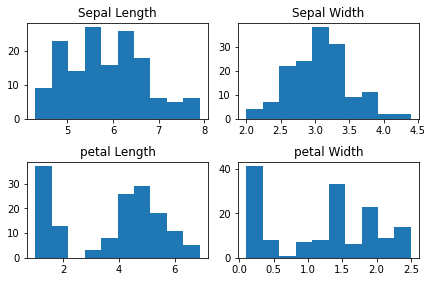

In [15]:
# histogram
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(df['sepal_length'], bins = n_bins)
axs[0,0].set_title("Sepal Length")
axs[0,1].hist(df['sepal_width'], bins = n_bins)
axs[0,1].set_title("Sepal Width")
axs[1,0].hist(df['petal_length'], bins = n_bins)
axs[1,0].set_title("petal Length")
axs[1,1].hist(df['petal_width'], bins = n_bins)
axs[1,1].set_title("petal Width")

fig.tight_layout(pad=1.0)

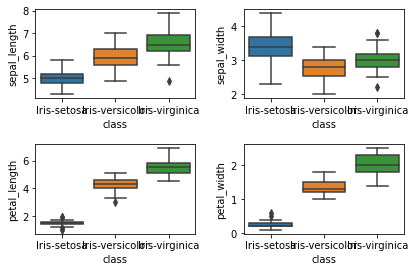

In [17]:
# using seaborn
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ["setosa", "versicolor", "virginica"]
sns.boxplot(x = 'class', y = 'sepal_length', data = df, ax = axs[0,0])
sns.boxplot(x = 'class', y = 'sepal_width', data = df, ax = axs[0,1])
sns.boxplot(x = 'class', y = 'petal_length', data = df, ax = axs[1,0])
sns.boxplot(x = 'class', y = 'petal_width', data = df, ax = axs[1,1])

fig.tight_layout(pad = 1.5)

<AxesSubplot:>

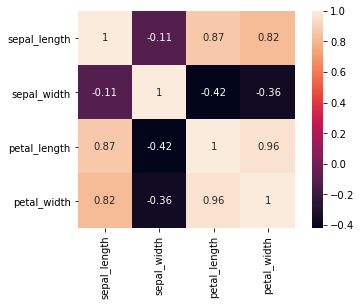

In [18]:
# correlation matrix

corrmat = df.corr()
sns.heatmap(corrmat, annot = True, square = True)



##### END DATA VISUALIZATION
-------------------
##### BEGIN TRAINING DATA

In [31]:
# take out to test set

train, test = train_test_split(df, test_size = 0.2, stratify = df['class'], random_state = 42)

In [46]:
train.groupby('class').size()
test.groupby('class').size()

class
Iris-setosa        10
Iris-versicolor    10
Iris-virginica     10
dtype: int64

In [44]:
# Model developmnet 
X_train = train[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y_train = train['class']
X_test = test[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y_test = test['class']

In [45]:
# First try decision tree

mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train, y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is ', "{:.3f}".format(metrics.accuracy_score(prediction, y_test)))

The accuracy of the Decision Tree is  0.967


[Text(209.25, 380.52, 'petal_width <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'petal_width <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(139.5, 163.07999999999998, 'petal_length <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'petal_length <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = virginica')]

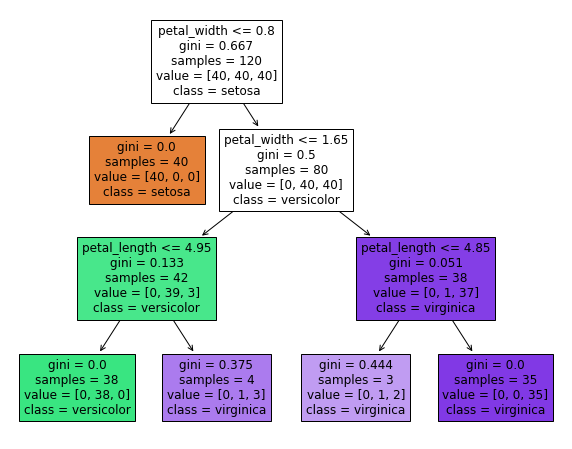

In [47]:
# Visualize the decision tree

plt.figure(figsize = (10, 8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True)